In [2]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

In [3]:
data = pd.read_csv('./heights (1).csv')

In [4]:
data

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


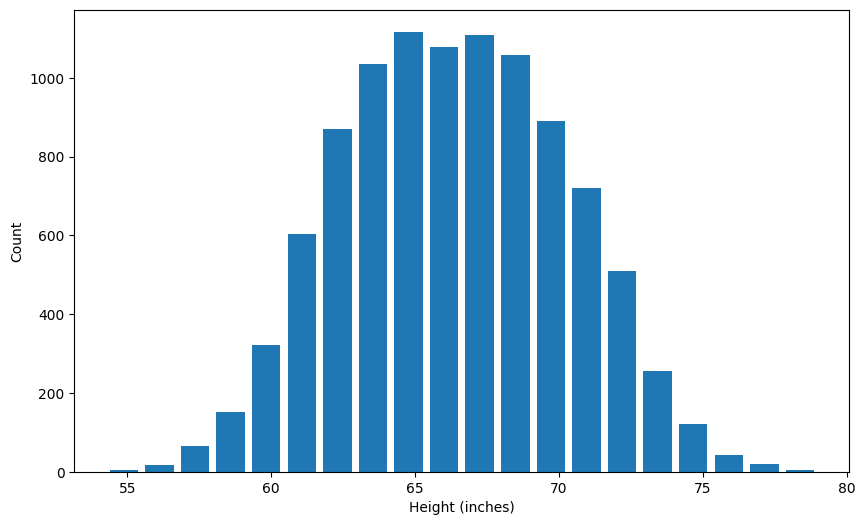

In [5]:
plt.hist(data['height'], bins=20, rwidth=0.8)
plt.xlabel("Height (inches)")
plt.ylabel('Count')
plt.show()

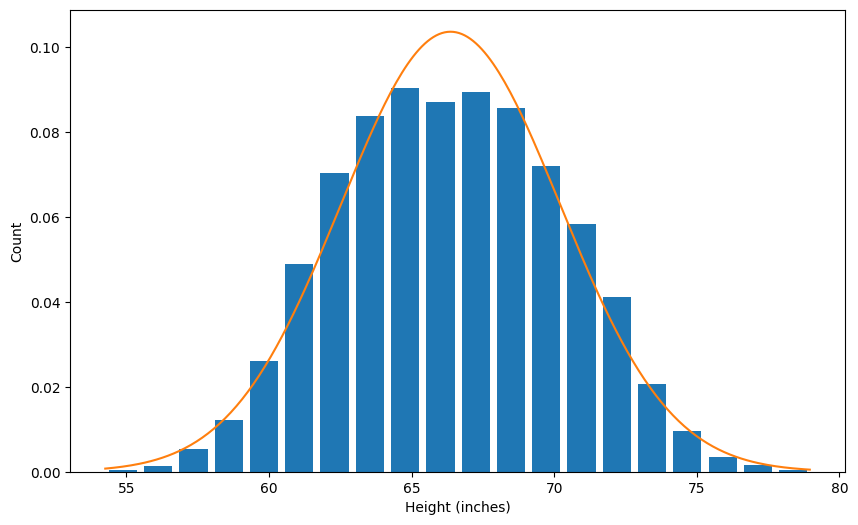

In [7]:
from scipy.stats import norm
import numpy as np
plt.hist(data.height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(data.height.min(), data.height.max(), 0.1)
plt.plot(rng, norm.pdf(rng,data.height.mean(),data.height.std()))

In [8]:
data['height'].mean()

66.367559754866

## (1) Outlier detection and removal using 3 standard deviation

In [10]:
upper_limit = data['height'].mean() + 3 * data['height'].std()

In [11]:
lower_limit = data['height'].mean() - 3 * data['height'].std()

In [41]:
upper_limit, lower_limit

(77.91014411725271, 54.824975392479274)

In [12]:
upper_limit, lower_limit

(77.91014411725271, 54.824975392479274)

In [13]:
data[(data['height'] > upper_limit) | (data['height'] < lower_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [14]:
data_no_outlier = data[(data['height'] < upper_limit) | (data['height'] > lower_limit)]

In [15]:
data_no_outlier

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [16]:
data_no_outlier.shape[0]

10000

### (2) Outlier detection and removal using Z Score


Z score is a way to achieve same thing that we did above in part (1)

Z score indicates how many standard deviation away a data point is.

For example in our case mean is 66.37 and standard deviation is 3.84.



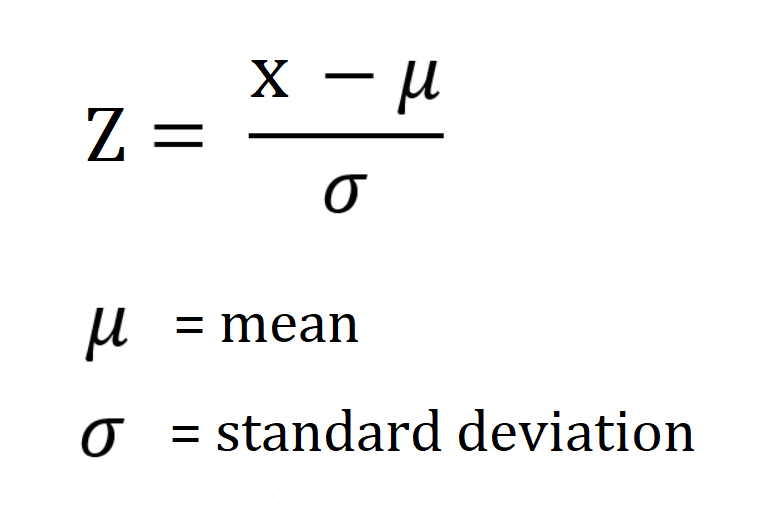

In [18]:
data['zscore'] = (data['height'] - data['height'].mean()) / data['height'].std()

In [19]:
data.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [20]:
data[data['zscore'] > 3]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [21]:
data[data['zscore'] < -3]

,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [24]:
data[(data['zscore'] < 3) | (data['zscore'] > -3)].shape

(10000, 3)

# Exercise

You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

(2) After removing outliers in step 1, you get a new dataframe.

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [25]:
data = pd.read_csv('./bhp.csv')
data.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [29]:
lower, upper = data['price_per_sqft'].quantile([0.001, 0.999])

In [42]:
lower, upper

(1366.184, 50959.36200000098)

In [43]:
data_quantile = data[(data['price_per_sqft'] > lower) & (data['price_per_sqft'] < upper)]

In [44]:
data_quantile.shape

(13172, 7)

In [37]:
upper_std = data_quantile['price_per_sqft'].mean() + 4*data_quantile['price_per_sqft'].std()
lower_std = data_quantile['price_per_sqft'].mean() - 4*data_quantile['price_per_sqft'].std()

In [45]:
data_quantile_std = data_quantile[(data_quantile['price_per_sqft'] > lower_std) & (data_quantile['price_per_sqft'] < upper_std)]

In [46]:
data_quantile_std.shape

(13047, 7)

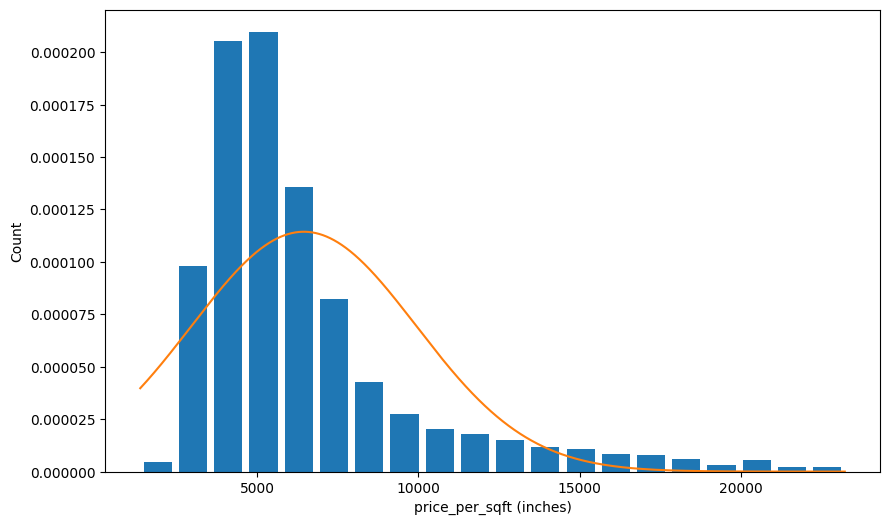

In [47]:
plt.hist(data_quantile_std['price_per_sqft'], bins=20, rwidth=0.8, density=True)
plt.xlabel('price_per_sqft (inches)')
plt.ylabel('Count')

rng = np.arange(data_quantile_std['price_per_sqft'].min(), data_quantile_std['price_per_sqft'].max(), 0.1)
plt.plot(rng, norm.pdf(rng,data_quantile_std['price_per_sqft'].mean(),data_quantile_std['price_per_sqft'].std()))

In [48]:
(data_quantile_std['price_per_sqft'] - data_quantile_std['price_per_sqft'].mean()) / data_quantile_std['price_per_sqft'].std()

0       -0.788586
1       -0.525947
2       -0.614831
3       -0.058586
4       -0.630601
           ...   
13195    0.068720
13196    1.336615
13197   -0.341583
13198    1.134761
13199   -0.963201
Name: price_per_sqft, Length: 13047, dtype: float64

In [49]:
data_quantile_std['zscore'] = (data_quantile_std['price_per_sqft'] - data_quantile_std['price_per_sqft'].mean()) / data_quantile_std['price_per_sqft'].std()

C:\Users\muham\AppData\Local\Temp\ipykernel_9764\3431174804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_quantile_std['zscore'] = (data_quantile_std['price_per_sqft'] - data_quantile_std['price_per_sqft'].mean()) / data_quantile_std['price_per_sqft'].std()


In [61]:
data_no_outlier = data_quantile_std[(data_quantile_std['zscore'] > -4) | (data_quantile_std['zscore'] < 4)]

In [62]:
data_no_outlier.shape

(13047, 8)